In [1]:
# load packages
from imutils import face_utils
import imutils
import dlib
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from face_functions import *

In [2]:
# load the images
art_image_name = 'files/mona_lisa.jpg'
headshot_image_name = 'files/headshot.jpg'

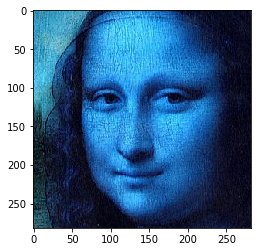

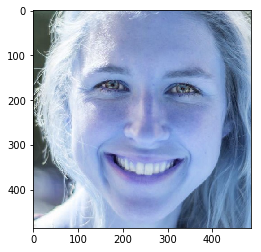

In [3]:
# compute the face cropped file for each image

# for the art image
art_image = cv2.imread(art_image_name,cv2.IMREAD_COLOR)
art_faces, art_face_detect, art_cropped_image, art_rectangle = compute_face_crop(art_image)
plt.figure()
plt.imshow(art_cropped_image)

# for the headshot image
headshot_image = cv2.imread(headshot_image_name,cv2.IMREAD_COLOR)
headshot_faces, headshot_face_detect, headshot_cropped_image, headshot_rectangle = compute_face_crop(headshot_image)
plt.figure()
plt.imshow(headshot_cropped_image)

In [4]:
# compute the face landmarks
# load the predictor from dlib
p = "files/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

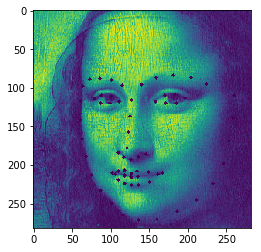

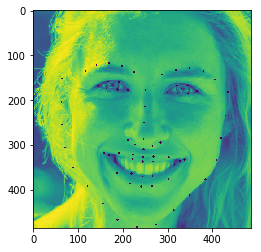

In [5]:
# compute the landmarks in the art and headshot faces
# for the art image
art_points, art_points1, art_cropped_lm_image = compute_landmarks(art_cropped_image,detector,predictor)
plt.figure()
plt.imshow(art_cropped_lm_image)

# for the headshot image
headshot_points, headshot_points1, headshot_cropped_lm_image = compute_landmarks(headshot_cropped_image,detector,predictor)
plt.figure()
plt.imshow(headshot_cropped_lm_image)

In [6]:
# find landmarks for the center of the eye
l_eye_art = art_points[42:48]
r_eye_art = art_points[36:42]
r_eye_art_center = find_center(art_cropped_image, r_eye_art)
l_eye_art_center = find_center(art_cropped_image, l_eye_art)
art_points.append(r_eye_art_center)
art_points.append(l_eye_art_center)

l_eye_hs = headshot_points[42:48]
r_eye_hs = headshot_points[36:42]
r_eye_hs_center = find_center(headshot_cropped_image, r_eye_hs)
l_eye_hs_center = find_center(headshot_cropped_image, l_eye_hs)
headshot_points.append(r_eye_hs_center)
headshot_points.append(l_eye_hs_center)

# find the landmark for the center of the mouth
mouth_art = art_points[48:59]
mouth_art_center = find_center(art_cropped_image, mouth_art)
art_points.append(mouth_art_center)

mouth_hs = headshot_points[48:59]
mouth_hs_center = find_center(headshot_cropped_image, mouth_hs)
headshot_points.append(mouth_hs_center)


In [7]:
# compute the convex hull for each image
hullIndex_art,hullIndex_art1 = computeHullIndex(art_points1, art_points)
hullIndex_headshot, hullIndex_headshot1 = computeHullIndex(headshot_points1, headshot_points)

# compute the convex hull for one image - corresponds to other
hull_art = []
hull_hs = []
for i in range(0, len(hullIndex_art1)):
    hull_hs.append(headshot_points[int(hullIndex_art1[i])])
    hull_art.append(art_points[int(hullIndex_art1[i])])

In [8]:
# decide which landmarks to keep
art_points_final = art_points
# art_points_final.append(art_points[36]) # tip of nose
# art_points_final.append(art_points[39]) # tip of nose
# art_points_final.append(art_points[42]) # tip of nose
# art_points_final.append(art_points[45]) # tip of nose
# art_points_final.append(art_points[48]) # l mouth corner
# art_points_final.append(art_points[54]) # r mouth corner
# art_points_final.append(art_points[68]) # r eye center
# art_points_final.append(art_points[69]) # l eye center
# art_points_final.append(art_points[70]) # mouth middle

headshot_points_final = headshot_points
# headshot_points_final.append(headshot_points[36]) # tip of nose
# headshot_points_final.append(headshot_points[39]) # tip of nose
# headshot_points_final.append(headshot_points[42]) # tip of nose
# headshot_points_final.append(headshot_points[45]) # tip of nose
# headshot_points_final.append(headshot_points[48]) # l mouth corner
# headshot_points_final.append(headshot_points[54]) # r mouth corner
# headshot_points_final.append(headshot_points[68]) # r eye center
# headshot_points_final.append(headshot_points[69]) # l eye center
# headshot_points_final.append(headshot_points[70]) # mouth middle


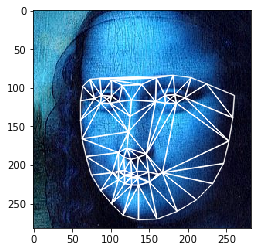

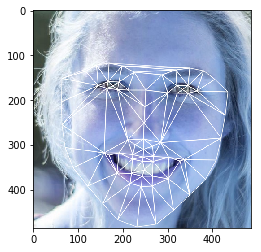

In [9]:
# find the Delaunay Triangulation for each image
dt_art, art_triangles = calculateDelaunayTriangles(art_cropped_image, art_points_final)
plt.figure()
plt.imshow(art_triangles)

# find the Delaunay Triangulation for each image
dt_headshot, headshot_triangles  = calculateDelaunayTriangles(headshot_cropped_image, headshot_points_final)
plt.figure()
plt.imshow(headshot_triangles)

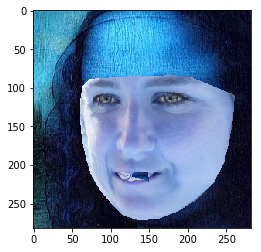

In [10]:
# compute the warped version of the headshot image
headshot_warped = compute_warped_image(headshot_cropped_image,art_cropped_image,dt_art,headshot_points_final,art_points_final)
plt.imshow(headshot_warped)

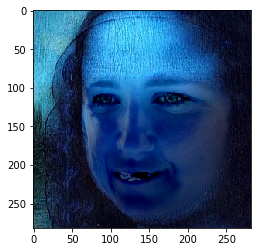

In [13]:
# compute the mask and seamlessly clone it into the art image
new_image, mask = clone_image(hullIndex_art,headshot_warped,art_cropped_image)
plt.imshow(new_image)

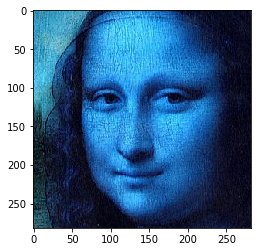

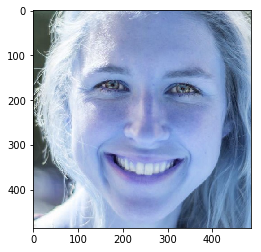

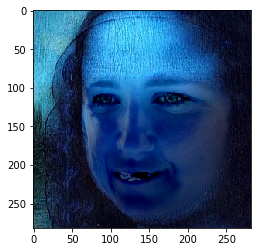

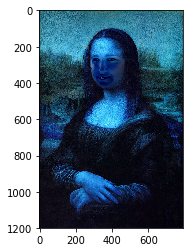

In [12]:
# place the cropped image back into the original art image
minx, miny, maxx, maxy = art_rectangle 
blended_image = np.copy(art_image)
blended_image[miny:maxy, minx:maxx,:] = new_image

# plot things
plt.figure()
plt.imshow(art_cropped_image)
plt.figure()
plt.imshow(headshot_cropped_image)
plt.figure()
plt.imshow(new_image)
plt.figure()
plt.imshow(blended_image)

output_name = 'files/output_image.jpg'
#cv2.imwrite('files/output_image_somepoints.jpg',new_image)